In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from pathlib import Path
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import os
os.getcwd()

'/Users/terezamianasyan/Downloads'

## Assumptions

In [5]:
## Binary logistic regression requires the dependent variable to be binary.
## For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
## Only the meaningful variables should be included.
## The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
## The independent variables are linearly related to the log odds.
## Logistic regression requires quite large sample sizes.

In [6]:
df = pd.read_csv('/Users/terezamianasyan/Downloads/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
# The dataset is related with direct marketing campaigns of a Portuguese banking institution. 
# The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
# The dataset provides the bank customers’ information. It includes 41,188 rows and 21 columns.

In [8]:
# The classification goal is to predict whether the client will subscribe to a term deposit or not.
# We will get 2 if customer will subscribe and 1 otherwise (variable Subscription). 

## Data Set Information

In [9]:
# Input variables:
# bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
# 21 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [10]:
# The education column of the dataset has many categories and we need to reduce the categories for a better modelling. 
# The education column has the following categories:

In [11]:
 df['education' ].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [12]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [13]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [14]:
 df['education' ].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Data exploration

In [16]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [17]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

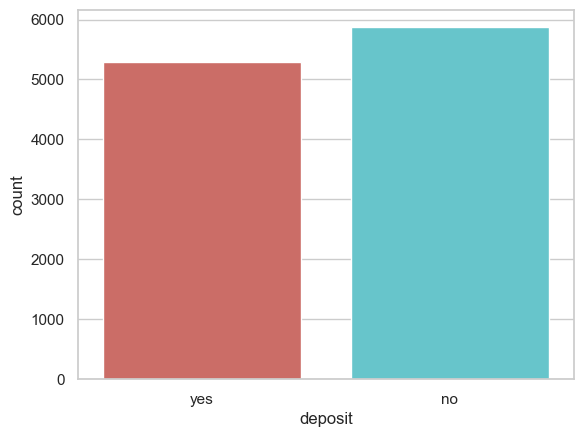

<Figure size 640x480 with 0 Axes>

In [18]:
sns. countplot(x='deposit' , data=df, palette='hls')
plt. show()
plt.savefig('count plot')

In [19]:
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})


In [20]:
count_no_sub = len(df[df['deposit']==0])
count_sub = len(df[df['deposit']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 52.61601863465329
percentage of subscription 47.38398136534671


In [21]:
# Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 53:47. 
# Before we go ahead to balance the classes, let’s do some more exploration.

In [22]:
df.groupby('deposit').mean()

/var/folders/v_/zgvdq1gn1798w9k748vmrn2h0000gn/T/ipykernel_47082/3657416372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('deposit').mean()


,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
0,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [23]:
# The average age of customers who bought the term deposit is higher than that of the customers who didn’t. 
# The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. 
# The lower the pdays, the better the memory of the last call and hence the better chances of a sale. 
# Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit. 

## Visualizations

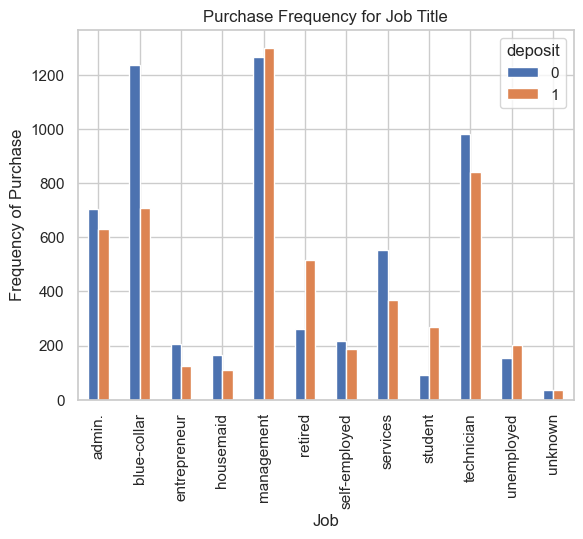

In [24]:
%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [25]:
## We can see the distibution of customers who subscribed for the deposit term categorised by jobs.
## 700 admins did not subscribe while only 400 did, so only 1 out of 10 admins subscribes.
## 7000 techinicians did not subscribe, whils 500 did, so only 1 out of 13 technicians subscribe. 
## Admins are more likely to subscribe than the technicians

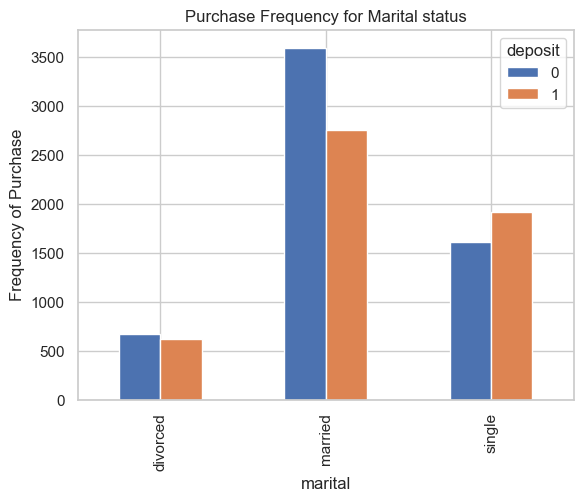

In [26]:
%matplotlib inline
pd.crosstab(df['marital'], df['deposit']).plot(kind='bar')
plt.title('Purchase Frequency for Marital status')
plt.xlabel('marital')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_marital')

In [27]:
## 4900 divorced customers subscribed for the deposit,900 did not, so 1 out of 5 customers subscribes for the term deposit
## 22500 married customers subscribed to the term deposit, whilst 2500 did not, only 1 out of 10 customers subscribes,
## 11000 single customers agreed and 2000 did not, so 1 out of 6 customers deposits,
## Divorced men are most likely subscribe for term deposit,
## In Quantitive  way most of the customers that subscribed were  married, 
## whilst the least amount of subscribtions were from divorced customers.

## Logistic Regression

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [29]:
# We use simple logistic regression to test if the last contact duration had an effect on subscription.

In [30]:
log_model = smf.logit(formula='deposit ~ duration', data=df)
log_result = log_model.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.559089
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11160
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1918
Time:                        12:56:19   Log-Likelihood:                -6240.6
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5699      0.038    -41.492      0.000      -1.644      -1.496
duration       0.0044      0.000     41.813      0.000       0.004       0.005
==============================================================================
"""

In [31]:
# p-value of duration is 0.000 which is less than 0.05, than we reject null hypothesis 
# and conclude that there is a statistically significant relationship between ‘duration’ and ‘deposit’.

In [32]:
log_model_1 = smf.logit(formula='deposit ~ age+marital+education+poutcome+duration+campaign+loan+default+contact', data=df)
log_result_1 = log_model_1.fit()
log_result_1.summary()

Optimization terminated successfully.
         Current function value: 0.456150
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11146
Method:                           MLE   Df Model:                           15
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3406
Time:                        12:56:21   Log-Likelihood:                -5091.5
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.1438      0.182    -11.800      0.000      -2.500      -1.788
marital[T.married]        -0.1852      0.080     -2.314      0.021      -0.342      -0.028
marital[T.single]          0.3378      0.092      3.683      0.000       0.158       0.518
education[T.secondary]     0.2793      0.082      3.403      0.001       0.118       0.440
education[T.tertiary]      0.5859      0.086      6.817      0.000       0.417       0.754
education[T.unknown]       0.4392      0.135      3.265      0.001       0.175       0.703
poutcome[T.other]          0.2587      0.120      2.157      0.031       0.024       0.494
poutcome[T.success]        2.3959      0.130     18.409      0.000       2.141       2.651
poutcome[T.unknown]       -0.2512      0.073     -3.430      0.001      -0.395      -0.108
loan[T.yes]               -0.7276      0.079     -9.221      0.000      -0.882      -0.573
default[T.yes]            -0.3130      0.214     -1.460      0.144      -0.733       0.107
contact[T.telephone]       0.0741      0.097      0.766      0.444      -0.116       0.264
contact[T.unknown]        -1.5446      0.075    -20.586      0.000      -1.692      -1.398
age                        0.0146      0.002      5.963      0.000       0.010       0.019
duration                   0.0050      0.000     43.057      0.000       0.005       0.005
campaign                  -0.1152      0.013     -9.009      0.000      -0.140      -0.090
==========================================================================================
"""

In [33]:
log_result_1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                deposit
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
marital[T.married]        -0.0277      0.012     -2.316      0.021      -0.051      -0.004
marital[T.single]          0.0505      0.014      3.692      0.000       0.024       0.077
education[T.secondary]     0.0417      0.012      3.408      0.001       0.018       0.066
education[T.tertiary]      0.0875      0.013      6.865      0.000       0.063       0.113
education[T.unknown]       0.0656      0.020      3.270      0.001       0.026       0.105
poutcome[T.other]          0.0387      0.018      2.159      0.031       0.004       0.074
poutcome[T.success]        0.3580      0.018     19.436      0.000       0.322       0.394
poutcome[T.unknown]       -0.0375      0.011     -3.437      0.001      -0.059      -0.016
loan[T.yes]               -0.1087      0.012     -9.340      0.000      -0.132      -0.086
default[T.yes]            -0.0468      0.032     -1.461      0.144      -0.110       0.016
contact[T.telephone]       0.0111      0.014      0.766      0.444      -0.017       0.039
contact[T.unknown]        -0.2308      0.011    -21.919      0.000      -0.251      -0.210
age                        0.0022      0.000      5.998      0.000       0.001       0.003
duration                   0.0007    1.1e-05     67.185      0.000       0.001       0.001
campaign                  -0.0172      0.002     -9.112      0.000      -0.021      -0.014
==========================================================================================
"""

In [34]:
# Interpretations

# Unit increase in age is expected to increase probability of subscription to a term deposit by 0.0006, or by 0.06% percentage points.

# Unit increase in last contact duration is expected to increase the probability of subscription to a term deposit by 0.0003, or by 0.03%.

# Unit increase in number of contacts performed during this campaign is expected to decrease the probability of subscription to a term deposit by 0.0028, or by 0.28%.

# People with high.school, illiterate, professional.course, university.degree, unknown education have higher chance of subscription to a term deposit compared to those who have basic education.  
# Percentage point differences are 0.88, 6.36, 1.68, 2.38 and 2.55 respectively. 

# With the married and unknown marital status users have lower chance of subscription to a term deposit compared to those who are divorced. 
# Percentage point differences are 0.18 and 0.4 respectively.
# On the other hand, people with single marital status have higher chance of subscription to a term deposit compared to those who are divorced by 1.26 percentage point.

# People who have successful and nonexistent outcome from the previous marketing campaign have higher chance of subscription to a term deposit compared to those who have failure outcome.  
# Percentage point differences are 2.65 and 13.14 respectively.

# People with posessing personal loan have lower chance of subscription to a term deposit compared to those who do not have personal loan by 0.45 percentage point.  

# Unit increase in consumer confidence index is expected to increase probability of subscription to a term deposit by 0.0035, or by 0.35% percentage points.


# Unit increase in euribor 3 month rate is expected to decrease probability of subscription to a term deposit by 0.0364, or by 3.64% percentage points.


In [35]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import scipy
full_ll = log_result_1.llf
print(full_ll)

-5091.547073975234


In [36]:
log_model1 = smf.logit(formula='deposit ~ age+poutcome+duration+campaign+loan+default+contact', data=df)
log_result1 = log_model1.fit()
log_result1.summary()
log_result1.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.462528
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                deposit
Method:                          dydx
At:                           overall
========================================================================================
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
poutcome[T.other]        0.0433      0.018      2.396      0.017       0.008       0.079
poutcome[T.success]      0.3695      0.019     19.867      0.000       0.333       0.406
poutcome[T.unknown]     -0.0360      0.011     -3.271      0.001      -0.058      -0.014
loan[T.yes]             -0.1218      0.012    -10.454      0.000      -0.145      -0.099
default[T.yes]          -0.0478      0.032     -1.476      0.140      -0.111       0.016
contact[T.telephone]     0.0093      0.014      0.641      0.522      -0.019       0.038
contact[T.unknown]      -0.2458      0.010    -23.417      0.000      -0.266      -0.225
age                      0.0004      0.000      1.296      0.195      -0.000       0.001
duration                 0.0007   1.11e-05     67.173      0.000       0.001       0.001
campaign                -0.0181      0.002     -9.482      0.000      -0.022      -0.014
========================================================================================
"""

In [37]:
reduced_ll = log_result1.llf
print(reduced_ll)

-5162.741294449823


In [38]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(reduced_ll-full_ll)

print(LR_statistic)

142.3884409491784


In [39]:
#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)

print(p_val)

1.204322789114576e-31


In [40]:
# From the output we can see that the Chi-Squared test-statistic is 89.80 and the corresponding p-value is 3.1490619404210734e-20.
# Since this p-value is less than 0.05, we reject the null hypothesis.
# This means the full model fits the data significantly better than the nested model. 
# Thus, we should use the full model because the additional predictor variables in the full model offer a significant improvement in fit.

In [41]:
# Preparing data for the analysis by getting dummy variables based on the categorical variables in the data set and replacement.
df['loan']=df['loan'].replace(['yes', 'no','unknown'],
                        [0, 1,2], inplace=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,1,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,1,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,1,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,1,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,0,cellular,8,may,9,2,172,5,failure,0


In [42]:
df['default']=df['default'].replace(['yes', 'no','unknown'],
                        [0, 1,2], inplace=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,no,1,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,1,yes,1,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,1,733,no,1,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,1,29,no,1,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,1,0,no,0,cellular,8,may,9,2,172,5,failure,0


In [43]:
df_new=pd.get_dummies(df, columns = ['poutcome','contact','marital', 'education'], prefix='dmy')
df_new

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,dmy_cellular,dmy_telephone,dmy_unknown,dmy_divorced,dmy_married,dmy_single,dmy_primary,dmy_secondary,dmy_tertiary,dmy_unknown
0,59,admin.,1,2343,yes,1,5,may,1042,1,...,0,0,1,0,1,0,0,1,0,0
1,56,admin.,1,45,no,1,5,may,1467,1,...,0,0,1,0,1,0,0,1,0,0
2,41,technician,1,1270,yes,1,5,may,1389,1,...,0,0,1,0,1,0,0,1,0,0
3,55,services,1,2476,yes,1,5,may,579,1,...,0,0,1,0,1,0,0,1,0,0
4,54,admin.,1,184,no,1,5,may,673,2,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,1,1,yes,1,20,apr,257,1,...,1,0,0,0,0,1,1,0,0,0
11158,39,services,1,733,no,1,16,jun,83,4,...,0,0,1,0,1,0,0,1,0,0
11159,32,technician,1,29,no,1,19,aug,156,2,...,1,0,0,0,0,1,0,1,0,0
11160,43,technician,1,0,no,0,8,may,9,2,...,1,0,0,0,1,0,0,1,0,0


In [44]:
df_new.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'deposit', 'dmy_failure',
       'dmy_other', 'dmy_success', 'dmy_unknown', 'dmy_cellular',
       'dmy_telephone', 'dmy_unknown', 'dmy_divorced', 'dmy_married',
       'dmy_single', 'dmy_primary', 'dmy_secondary', 'dmy_tertiary',
       'dmy_unknown'],
      dtype='object')

In [45]:
# Defining the predictor(independent) variables and the response(dependent) variables. 
# Spliting the data into training( 80% of observations)/testing sets( 20% of observations).
# Dummies for base (reference) categories are not included in the list of independent variables.

In [46]:
# as reference categories we can choose 'dmy_divorced' and 'dmy_Basic'.

In [47]:
X = df_new[['age', 'dmy_married', 'dmy_single',  'default', 'loan', 'duration', 'campaign']]
y = df_new['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train

,age,dmy_married,dmy_single,default,loan,duration,campaign
3955,28,0,1,1,1,1042,5
11150,34,1,0,1,1,314,3
5173,48,0,0,1,1,594,1
3017,53,1,0,1,1,351,1
2910,53,1,0,1,1,166,3
...,...,...,...,...,...,...,...
5734,47,1,0,1,1,80,2
5191,28,0,1,1,1,449,2
5390,35,1,0,1,1,197,13
860,51,1,0,1,1,372,5


In [49]:
from sklearn import tree

dt_new = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt_new = dt_new.fit(X_train, y_train)

y_pred = dt_new.predict(X_test)

In [50]:
# Running a logistic regression
# we can set maximum number of iterrations to 5000 orr any other high number to skip the warning of no convergence
# even though model will be obtained even with the warning 

#instantiate the model
log_regression = LogisticRegression(max_iter=5000)

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [51]:
# Apply a cutoff threshold 0.3 to obtain Sensitivity and Specificity for that threshold using the test data set.
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
y_pred_proba_binary = np.where(y_pred_proba > 0.3, 1, 0)
pd.crosstab(y_pred_proba_binary ,y_test)

deposit,0,1
row_0,,
0,575,89
1,591,978


In [52]:
y_pred_proba

array([0.43907493, 0.96359142, 0.73172159, ..., 0.25378921, 0.67506802,
       0.14190418])

In [53]:
sensitivity = 315/943
sensitivity

0.3340402969247084

In [54]:
specificity = 6972/7295
specificity

0.9557230980123372

In [55]:
# Use decision tree analysis method to predict subscribtion probability(y) using train data set. 
# Choose as max depth of the tree equal to 5

In [56]:
# arguments of DecisionTreeRegressor() which may be changed for pruning min_samples_leaf=30, max_depth=2
# define classification algorithm
model_tree = tree.DecisionTreeClassifier(max_depth = 5, criterion = "entropy")
results_tree = model_tree.fit(X_train, y_train)

In [57]:
#Getting predictions based on the test data set
predictions_tree = results_tree.predict(X_test)

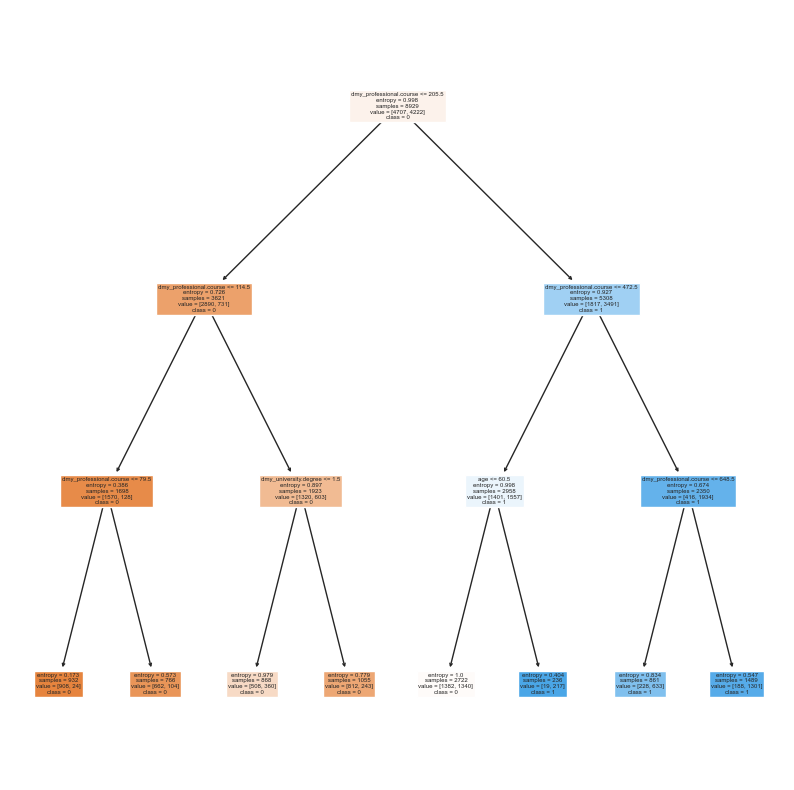

In [58]:
# Plot the regression tree
feature_names = ['age', 'dmy_married', 'dmy_single', 'dmy_high.school','dmy_high.school','dmy_professional.course',  'dmy_university.degree', 'default', 'loan', 'duration', 'campaign', 'dmy_failure', 'dmy_nonexistent']
class_names = ['0', '1']

fig = plt.figure(figsize=(10,10))
plot = tree.plot_tree(dt_new, 
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

In [59]:
## Based on the tree predict
## For the samle Duration: 500, age : 60 then we will predict  class 0,
## we will predict for the customer to not subscribe

In [60]:
# accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7044334975369458

In [61]:
# Calculating the sensitivity(recall) and Specificity(precision) for the model. 
# Comparing the results 
# precision
print("Specificity", precision_score(y_test, predictions_tree))
# recall
print("Sensitivity", recall_score(y_test, predictions_tree))

Specificity 0.8034993270524899
Sensitivity 0.5595126522961574


In [62]:
# In Logistic Regression model we got the specificity=0.949 and sensitivity = 0.494.

# Comparing the results we can see that they are different from each other.

# Decision tree has lower Specificity compare to Logistic Regression model.

# If different threshold was chosen in Logistic Regression model the results may have been more comparable.

In [63]:
# Getting feature importances of independent variables.
# Comparing them with the results in Logistic Regression model.


<Axes: >

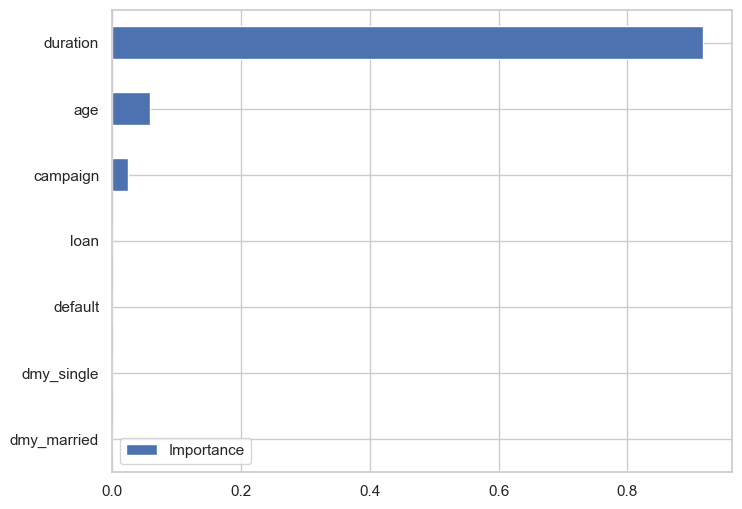

In [64]:
feat_importances = pd.DataFrame(dt_new.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6))

In [65]:
# From the marginal effects analysis we can see that duration and age variables had significant effect on the probability ofsubscribtion to a term deposit along with other variables such as campaign, education and marital status. 
# While Decision tree feature importances suggest that only duration and age are important predictors of the probability of subscribtion to a term deposit.

# The results for feature importances may have been different and include more factors if max depth was not set to 3. 
# In that case other variables would also have been used in the splits and would have positive feature importances.

## Bagging

In [66]:
from sklearn import ensemble
#n_estimators - This represents the number of weak learners used. default will use 10 decision 
# trees to build the bagging model.
#max_samples - The maximum number of data that is sampled from the training set

bag_model = ensemble.BaggingClassifier(n_estimators=100)
bag_model.fit(X_train, y_train)
print(bag_model)

BaggingClassifier(n_estimators=100)


In [67]:
expected_y  = y_test
predicted_y = bag_model.predict(X_test) 

In [68]:
# precision-spec
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.6914498141263941

In [69]:
# recall-sens
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.697282099343955

In [70]:
#from sklearn import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
feature_importances

array([0.23944891, 0.0254089 , 0.02029979, 0.00315358, 0.021195  ,
       0.62060854, 0.06988528])

<Axes: >

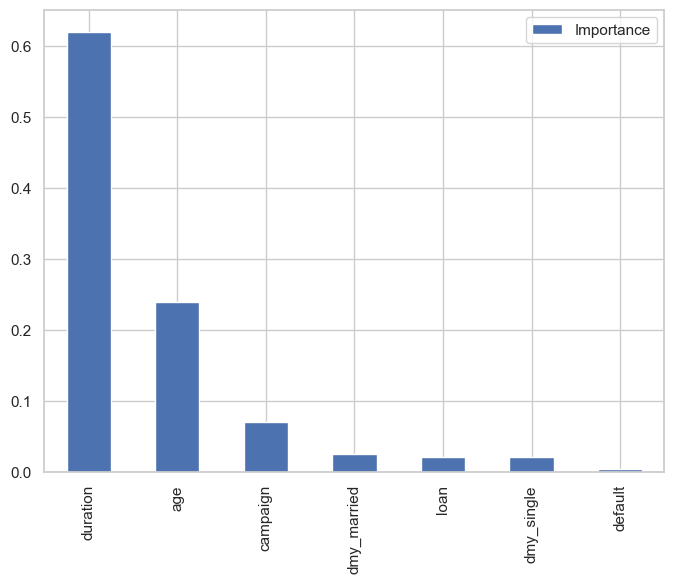

In [71]:
feat_importances = pd.DataFrame(feature_importances, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [72]:
# Approx 60% of total gini reduction happened as a result of splits based on variable 'duration'.
# Approx 19% of total gini reduction happened as a result of splits based on variable 'age'.

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
#max_features=3
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
expected_y  = y_test
predicted_y = rf_model.predict(X_test) 

In [76]:
# precision
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.694392523364486

In [77]:
# recall
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.6963448922211809

In [78]:
rf_model.feature_importances_

array([0.23383238, 0.00794721, 0.0073857 , 0.00314191, 0.01307582,
       0.67632385, 0.05829314])

<Axes: >

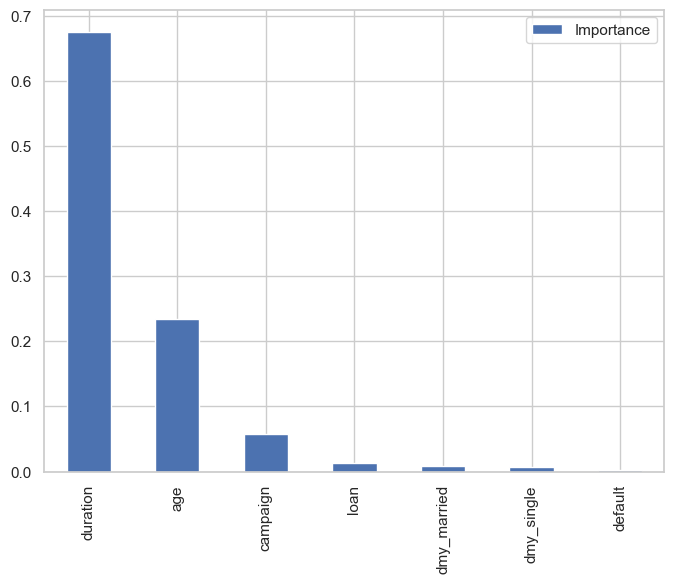

In [79]:
feat_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [80]:
# Approx 60% of total entropy reduction happened as a result of splits based on variable 'duration'. 
# Approx 23% of total entropy reduction happened as a result of splits based on variable 'age'.